In [1]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import cross_val_score

from DBNAC import DBNClassifier, SimpleDBNClassifier

In [2]:
X, y = load_digits(return_X_y=True)
print(X.shape)

(1797, 64)


In [3]:
clf = DBNClassifier(n_hiddens=[500, 100, 20], k=3, 
                    loss_ae='MSELoss', loss_clf='CrossEntropyLoss',
                    optimizer_ae='Adam', optimizer_clf='Adam',
                    lr_rbm=1e-5, lr_ae=0.01, lr_clf=0.01,
                    epochs_rbm=100, epochs_ae=50, epochs_clf=50,
                    batch_size_rbm=50, batch_size_ae=50, batch_size_clf=50,
                    loss_ae_kwargs={}, loss_clf_kwargs={},
                    optimizer_ae_kwargs=dict(), optimizer_clf_kwargs=dict(), 
                    random_state=42, use_gpu=True, verbose=False)
scores = cross_val_score(clf, X, y)
print(np.mean(scores))
print(scores)

0.9298777468276075
[0.95       0.91944444 0.94428969 0.95264624 0.88300836]


In [4]:
clf = SimpleDBNClassifier(n_hiddens=[500, 100, 20], lr_pre_train=1e-5, lr_fine_tune=0.01, 
                 epochs_pre_train=100, epochs_fine_tune=50, batch_size=50, k=3, 
                 random_state=42, use_gpu=True, verbose=False)
scores = cross_val_score(clf, X, y)
print(np.mean(scores))
print(scores)

0.9298777468276075
[0.95       0.91944444 0.94428969 0.95264624 0.88300836]


In [3]:
import matplotlib.pyplot as plt

In [4]:
clf = SimpleDBNClassifier(n_hiddens=[500, 100, 20], lr_pre_train=1e-5, lr_fine_tune=0.01, 
                          epochs_pre_train=100, epochs_fine_tune=50, batch_size=50, k=3, 
                          random_state=42, use_gpu=False, verbose=False)
clf.fit(X[:1000], y[:1000])

SimpleDBNClassifier(batch_size=50, epochs_fine_tune=50, epochs_pre_train=100,
                    n_hiddens=[500, 100, 20], use_gpu=False, verbose=False)

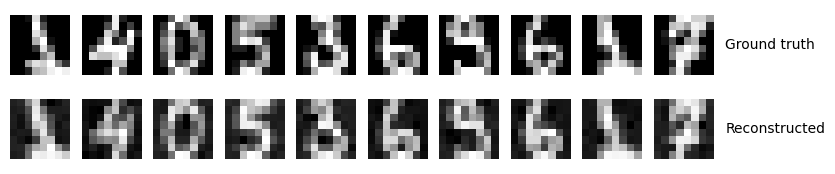

In [5]:
# Plot the digits in a row
fig, axs = plt.subplots(2, 11, figsize=(10, 2))
for i in range(10):
    digit = X[1000+i]
    digit_reconstructed = clf.aedbn_.forward(digit).detach().numpy()
    axs[0,i].imshow(digit.reshape(8,8), cmap='gray')
    axs[1,i].imshow(digit_reconstructed.reshape(8,8), cmap='gray')
    axs[0,i].axis('off')
    axs[1,i].axis('off')
axs[0,-1].text(0, 0.5, 'Ground truth', ha='left', va='center')
axs[1,-1].text(0, 0.5, 'Reconstructed', ha='left', va='center')
axs[0,-1].axis('off')
axs[1,-1].axis('off')

plt.show()